In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from pathlib import Path
%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

In [3]:
# amount that retiree can invest.  Answer from Questionaire.
savings_amount = 1000

#### Cryptocurrency Analysis
#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [4]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [5]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18783631,
            "id": 1,
            "last_updated": 1628751878,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 845105291253,
                    "percent_change_1h": 0.344429980185291,
                    "percent_change_24h": -1.78030479469628,
                    "percent_change_7d": 13.9890107739541,
                    "percentage_change_1h": 0.344429980185291,
                    "percentage_change_24h": -1.78030479469628,
                    "percentage_change_7d": 13.9890107739541,
                    "price": 45312.0,
                    "volume_24h": 37978525621
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18783631,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencie

In [6]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 117071721,
            "id": 1027,
            "last_updated": 1628751867,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 366899504397,
                    "percent_change_1h": 0.0097871642811667,
                    "percent_change_24h": -2.2085827408595,
                    "percent_change_7d": 15.0076312046351,
                    "percentage_change_1h": 0.0097871642811667,
                    "percentage_change_24h": -2.2085827408595,
                    "percentage_change_7d": 15.0076312046351,
                    "price": 3133.42,
                    "volume_24h": 28710358159
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 117071721,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurren

#### Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [7]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f"The price for Bitcoin is ${btc_price:,.2f}")


The price for Bitcoin is $45,312.00


In [8]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"The price for Ethereum is ${eth_price:,.2f}")


The price for Ethereum is $3,133.42


#### Calculate the amount of coins the retiree can afford to purchase.  
#### Take amount able to invest divide by 2, equals "half the amount".
#### Take "half the amount" divide by BTC price equals the amount of BTC to purchase.
#### Take "half the amount" divide by ETH price equals the amount of ETH to purchase.

In [9]:
half_savings = savings_amount / 2
btc_coins = half_savings / btc_price
eth_coins = half_savings / eth_price

In [10]:
# Print current holding in BTC
print(f"You now are holding {btc_coins} Bitcoin")

You now are holding 0.011034604519774012 Bitcoin


In [11]:
# Print current holding in ETH
print(f"The now are holding {eth_coins} Ethereum")

The now are holding 0.15957005444530256 Ethereum


In [12]:
# Read in the CSV file called "Bitcoin Historical Data.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
btc_df = pd.read_csv(
    Path('./Resources/Bitcoin Historical Data.csv'), 
    index_col="Date", parse_dates=True, infer_datetime_format=True)

In [13]:
btc_df.loc[:,"Price"]=btc_df.loc[:,"Price"].str.replace(",","")
btc_df.loc[:,"Price"]=btc_df.loc[:,"Price"].astype("float")

btc_df.loc[:,"Open"]=btc_df.loc[:,"Open"].str.replace(",","")
btc_df.loc[:,"Open"]=btc_df.loc[:,"Open"].astype("float")

btc_df.loc[:,"High"]=btc_df.loc[:,"High"].str.replace(",","")
btc_df.loc[:,"High"]=btc_df.loc[:,"High"].astype("float")

btc_df.loc[:,"Low"]=btc_df.loc[:,"Low"].str.replace(",","")
btc_df.loc[:,"Low"]=btc_df.loc[:,"Low"].astype("float")

btc_df = btc_df.drop(columns=["Change %"])

In [14]:
# This function converts the string values into a floating point number
def clean_currency(price_string):
    price = price_string
    if type(price_string) == str:
        price_string = price_string.replace('$', '')
        if price_string[-1] == 'K':
            thousand = 1000
            price_string = price_string.replace('K', '')
            price = float(price_string)
            price = price * thousand
        elif price_string[-1] == 'M':
            million = 1000000
            price_string = price_string.replace('M', '')
            price = float(price_string)
            price = price * million
        else:
            billion = 1000000000
            price_string = price_string.replace('B', '')
            price = float(price_string)
            price = price * billion
    return price

In [15]:
btc_df['Vol.'] = btc_df['Vol.'].apply(clean_currency)

In [16]:
list(btc_df.columns)

['Price', 'Open', 'High', 'Low', 'Vol.']

In [17]:
btc_df2 = btc_df[['Open', 'High', 'Low', 'Price', 'Vol.']]
columns = ["open", "high"," low", "close", "volume"]
btc_df2.columns = columns
btc_df2.keys()


Index(['open', 'high', ' low', 'close', 'volume'], dtype='object')

In [18]:
# Read in the CSV file called "Bitcoin Historical Data.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
eth_df = pd.read_csv(
    Path('./Resources/Ethereum Historical Data.csv'), 
    index_col="Date", parse_dates=True, infer_datetime_format=True)

In [19]:
eth_df.loc[:,"Price"]=eth_df.loc[:,"Price"].str.replace(",","")
eth_df.loc[:,"Price"]=eth_df.loc[:,"Price"].astype("float")

eth_df.loc[:,"Open"]=eth_df.loc[:,"Open"].str.replace(",","")
eth_df.loc[:,"Open"]=eth_df.loc[:,"Open"].astype("float")

eth_df.loc[:,"High"]=eth_df.loc[:,"High"].str.replace(",","")
eth_df.loc[:,"High"]=eth_df.loc[:,"High"].astype("float")

eth_df.loc[:,"Low"]=eth_df.loc[:,"Low"].str.replace(",","")
eth_df.loc[:,"Low"]=eth_df.loc[:,"Low"].astype("float")

eth_df = eth_df.drop(columns=["Change %"])

eth_df['Vol.'] = eth_df['Vol.'].apply(clean_currency)

In [20]:
eth_df2 = eth_df[['Open', 'High', 'Low', 'Price', 'Vol.']]
columns = ["open", "high"," low", "close", "volume"]
eth_df2.columns = columns
eth_df2.head()

,open,high,low,close,volume
Date,,,,,
2021-07-30,2380.59,2467.40,2320.80,2460.95,1030000.0
2021-07-29,2299.46,2397.71,2269.15,2380.93,642750.0
2021-07-28,2300.21,2343.49,2246.23,2299.11,968940.0
2021-07-27,2230.24,2318.68,2152.92,2300.22,1250000.0
2021-07-26,2189.74,2430.01,2174.44,2229.53,1890000.0


In [21]:
# Create a dictionary of the two dataframes
to_merge_dict = {'BTC': btc_df2 , 'ETH': eth_df2}

In [22]:
# Use concat to create a merged dataframe from the dictionary
merged_df = pd.concat(to_merge_dict.values(), axis=1, keys=to_merge_dict.keys())

In [23]:
merged_df.head()

BTC                                           ETH           \
               open     high      low    close    volume     open     high   
Date                                                                         
2021-07-30  40001.1  42264.4  38358.4  42203.4   98450.0  2380.59  2467.40   
2021-07-29  40009.0  40630.7  39340.8  40001.4   75300.0  2299.46  2397.71   
2021-07-28  39450.4  40862.2  38883.8  40003.2  148920.0  2300.21  2343.49   
2021-07-27  37294.3  39455.9  36427.4  39452.0  100240.0  2230.24  2318.68   
2021-07-26  35392.3  40522.9  35236.7  37276.6  177630.0  2189.74  2430.01   

                                         
                low    close     volume  
Date                                     
2021-07-30  2320.80  2460.95  1030000.0  
2021-07-29  2269.15  2380.93   642750.0  
2021-07-28  2246.23  2299.11   968940.0  
2021-07-27  2152.92  2300.22  1250000.0  
2021-07-26  2174.44  2229.53  1890000.0

In [24]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# Run 500 samples.
MC_cryptothirtyyear = MCSimulation(
  portfolio_data = merged_df,
  weights = [.5, .5],
  num_simulation = 500,
  num_trading_days = 252*30
)

# Review the simulation input data
MC_cryptothirtyyear.portfolio_data.head()


BTC                                                    \
               open     high      low    close    volume daily_return   
Date                                                                    
2021-07-30  40001.1  42264.4  38358.4  42203.4   98450.0          NaN   
2021-07-29  40009.0  40630.7  39340.8  40001.4   75300.0    -0.052176   
2021-07-28  39450.4  40862.2  38883.8  40003.2  148920.0     0.000045   
2021-07-27  37294.3  39455.9  36427.4  39452.0  100240.0    -0.013779   
2021-07-26  35392.3  40522.9  35236.7  37276.6  177630.0    -0.055140   

                ETH                                                     
               open     high      low    close     volume daily_return  
Date                                                                    
2021-07-30  2380.59  2467.40  2320.80  2460.95  1030000.0          NaN  
2021-07-29  2299.46  2397.71  2269.15  2380.93   642750.0    -0.032516  
2021-07-28  2300.21  2343.49  2246.23  2299.11   968940.0    -0.034365  
2021-07-27  2230.24  2318.68  2152.92  2300.22  1250000.0     0.000483  
2021-07-26  2189.74  2430.01  2174.44  2229.53  1890000.0    -0.030732

In [25]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_cryptothirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.068915,1.017364,1.005638,9.952962e-01,0.993034,1.009673,1.007760,0.933302,1.065557,1.018269,...,0.992630,0.968733,1.019505,1.048925,0.921179,1.038787,0.981782,0.966729,1.009361,0.994791
2,1.141747,1.048547,0.989729,1.014206e+00,1.016868,0.991069,1.008559,0.948487,1.108219,0.997762,...,1.029286,0.995713,1.031376,1.047128,0.894748,1.046592,0.967922,0.958951,1.013774,0.974953
3,1.181036,1.027613,1.000255,1.004436e+00,1.010886,0.982188,0.950520,0.970990,1.143763,0.945833,...,1.050362,0.966987,1.036859,1.055585,0.882787,1.082943,0.996358,0.976394,1.018681,0.938026
4,1.183631,0.980509,0.970466,1.051248e+00,0.990277,0.977828,1.012100,0.937472,1.158288,0.923579,...,1.071917,0.982732,1.046667,1.101216,0.879806,1.025637,1.032102,1.005886,1.065923,0.936194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0.000300,0.000150,0.000010,1.033263e-07,0.000123,0.000043,0.001779,0.000281,0.000300,0.000437,...,0.000594,0.018241,0.000069,0.004418,0.004092,0.000331,0.000156,0.000562,0.000528,0.000471
7557,0.000309,0.000159,0.000010,1.085342e-07,0.000121,0.000045,0.001873,0.000269,0.000300,0.000455,...,0.000569,0.017998,0.000069,0.004474,0.004262,0.000344,0.000155,0.000549,0.000527,0.000500
7558,0.000313,0.000166,0.000010,1.095173e-07,0.000116,0.000044,0.001951,0.000257,0.000295,0.000447,...,0.000541,0.017428,0.000067,0.004386,0.004161,0.000322,0.000152,0.000562,0.000526,0.000519
7559,0.000315,0.000171,0.000010,1.071129e-07,0.000117,0.000045,0.001942,0.000279,0.000296,0.000455,...,0.000572,0.016921,0.000067,0.004579,0.004211,0.000315,0.000162,0.000560,0.000529,0.000529


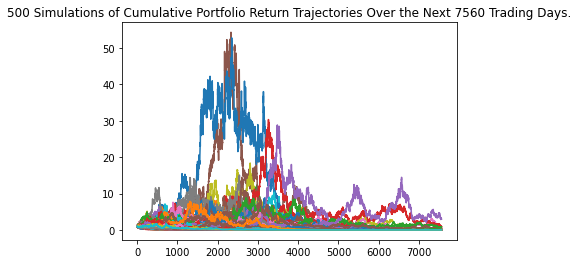

In [26]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_cryptothirtyyear.plot_simulation()

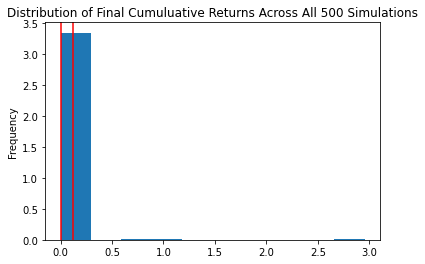

In [27]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_cryptothirtyyear.plot_distribution()


In [28]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_cryptothirtyyear.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_summary_statistics)

count           5.000000e+02
mean            2.196070e-02
std             1.525206e-01
min             1.058570e-07
25%             8.151021e-05
50%             6.442860e-04
75%             5.160170e-03
max             2.955723e+00
95% CI Lower    2.358037e-06
95% CI Upper    1.204777e-01
Name: 7560, dtype: float64


In [29]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of cryptocurrency is ${savings_amount:,.2f}")

The current balance of cryptocurrency is $1,000.00


In [30]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_summary_statistics[8]*savings_amount
ci_upper_thirty_cumulative_return = MC_summary_statistics[9]*savings_amount

# Print the result of your calculations
print(f"There is a 95% chance that the portfolio over the next 30 years will end within in the range of ${ci_lower_thirty_cumulative_return:,.2f} and ${ci_upper_thirty_cumulative_return:,.2f}.")

There is a 95% chance that the portfolio over the next 30 years will end within in the range of $0.00 and $120.48.


## Coding for FAANG portion begins here

#### Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [31]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


#### Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: using 7/30/2018 - 7/30/2021


In [32]:
# Set the tickers for the stock portion of the portfolio
tickers = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2021-07-30", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-07-30", tz="America/New_York").isoformat()


In [33]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Review the first 5 rows of the Alpaca DataFrame
df_portfolio.head()


AAPL                                       AMZN  \
                             open    high     low   close    volume     open   
time                                                                           
2021-07-30 00:00:00-04:00  144.43  146.33  144.11  145.86  57136664  3347.74   

                                                               ...     GOOG  \
                              high      low    close   volume  ...     open   
time                                                           ...            
2021-07-30 00:00:00-04:00  3368.14  3306.98  3327.59  9183755  ...  2714.96   

                                                                   NFLX  \
                                high       low    close  volume    open   
time                                                                      
2021-07-30 00:00:00-04:00  2715.4272  2696.284  2704.66  940258  512.69   

                                                              
                             high       low   close   volume  
time                                                          
2021-07-30 00:00:00-04:00  519.79  510.9642  517.79  2166365  

[1 rows x 25 columns]

In [34]:
# Access the closing price for FB from the Alpaca DataFrame
# Converting the value to a floating point number
fb_close_price = df_portfolio["FB"]["close"]
fb_close_price = float(fb_close_price)
# Print the FB closing price
print(f"The closing price of Facebook is ${fb_close_price:,.2f}")

The closing price of Facebook is $356.36


In [35]:
# Access the closing price for AMZN from the Alpaca DataFrame
# Converting the value to a floating point number
amzn_close_price = df_portfolio["AMZN"]["close"]
amzn_close_price = float(amzn_close_price)
# Print the AMZN closing price
print(f"The closing price of Amazon is ${amzn_close_price:,.2f}")

The closing price of Amazon is $3,327.59


In [36]:
# Access the closing price for FB from the Alpaca DataFrame
# Converting the value to a floating point number
aapl_close_price = df_portfolio["AAPL"]["close"]
aapl_close_price = float(aapl_close_price)
# Print the AAPL closing price
print(f"The closing price of Apple is ${aapl_close_price:,.2f}")

The closing price of Apple is $145.86


In [37]:
# Access the closing price for FB from the Alpaca DataFrame
# Converting the value to a floating point number
nflx_close_price = df_portfolio["NFLX"]["close"]
nflx_close_price = float(nflx_close_price)
# Print the NFLX closing price
print(f"The closing price of Netflix is ${nflx_close_price:,.2f}")

The closing price of Netflix is $517.79


In [38]:
# Access the closing price for GOOG from the Alpaca DataFrame
# Converting the value to a floating point number
goog_close_price = df_portfolio["GOOG"]["close"]
goog_close_price = float(goog_close_price)
# Print the GOOG closing price
print(f"The closing price of Google is ${goog_close_price:,.2f}")

The closing price of Google is $2,704.66


## Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for an even 5-way split between FAANG stocks.

2. Run a Monte Carlo simulation of 500 samples and (ANSWER FROM QUESTIONAIRE) for the FAANG portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics.

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics.

4. Generate the summary statistics for the Monte Carlo simulation.



#### Make an API call via the Alpaca SDK to get 3 years of historical closing prices for FAANG

In [39]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp("2018-07-30", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-07-30", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [40]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  start=start_date,
  end=end_date,
  limit=limit_rows
).df


# Display both the first and last five rows of the DataFrame
display(prices_df.head())
display(prices_df.tail())


AAPL                                      \
                             open    high       low   close    volume   
time                                                                    
2018-07-30 00:00:00-04:00  191.90  192.20  189.0700  189.94  15726885   
2018-07-31 00:00:00-04:00  190.34  192.14  189.3400  190.58  23827866   
2018-08-01 00:00:00-04:00  199.13  201.76  197.3100  201.62  55058201   
2018-08-02 00:00:00-04:00  200.58  208.38  200.3500  207.38  52607314   
2018-08-03 00:00:00-04:00  207.03  208.74  205.4803  207.98  26246694   

                              AMZN                                         \
                              open       high       low    close   volume   
time                                                                        
2018-07-30 00:00:00-04:00  1827.33  1829.5000  1766.020  1779.28  5352547   
2018-07-31 00:00:00-04:00  1786.49  1801.8300  1739.320  1777.41  5382278   
2018-08-01 00:00:00-04:00  1784.00  1798.4365  1776.020  1797.05  3885543   
2018-08-02 00:00:00-04:00  1788.77  1836.5600  1786.000  1834.21  3880943   
2018-08-03 00:00:00-04:00  1838.78  1841.0000  1821.501  1822.93  2389567   

                           ...     GOOG                                     \
                           ...     open     high      low    close  volume   
time                       ...                                               
2018-07-30 00:00:00-04:00  ...  1228.03  1234.92  1211.47  1219.87  933257   
2018-07-31 00:00:00-04:00  ...  1220.36  1227.59  1205.60  1217.71  820753   
2018-08-01 00:00:00-04:00  ...  1228.47  1233.47  1210.21  1219.10  794809   
2018-08-02 00:00:00-04:00  ...  1205.90  1229.88  1204.79  1226.08  787456   
2018-08-03 00:00:00-04:00  ...  1228.28  1230.00  1215.06  1223.71  463178   

                             NFLX                                      
                             open    high       low   close    volume  
time                                                                   
2018-07-30 00:00:00-04:00  351.93  352.03  334.0201  334.97  13870944  
2018-07-31 00:00:00-04:00  331.53  342.50  328.0000  337.43  10702607  
2018-08-01 00:00:00-04:00  335.85  344.41  334.0200  338.41   5798530  
2018-08-02 00:00:00-04:00  337.23  345.00  334.7100  344.50   5291303  
2018-08-03 00:00:00-04:00  347.75  347.86  338.4768  343.09   5878553  

[5 rows x 25 columns]

AAPL                                        AMZN  \
                             open    high     low   close     volume     open   
time                                                                            
2021-07-26 00:00:00-04:00  148.27  149.83  147.70  148.99   62046190  3672.83   
2021-07-27 00:00:00-04:00  149.14  149.21  145.55  146.78   83259254  3698.75   
2021-07-28 00:00:00-04:00  144.82  146.97  142.54  144.98  105969829  3633.26   
2021-07-29 00:00:00-04:00  144.66  146.55  144.58  145.62   48298474  3625.53   
2021-07-30 00:00:00-04:00  144.43  146.33  144.11  145.86   57136664  3347.74   

                                                                   ...  \
                                high      low      close   volume  ...   
time                                                               ...   
2021-07-26 00:00:00-04:00  3712.0800  3647.25  3700.0000  2394859  ...   
2021-07-27 00:00:00-04:00  3699.3400  3586.15  3628.6400  3801566  ...   
2021-07-28 00:00:00-04:00  3658.4204  3601.00  3630.3035  2598854  ...   
2021-07-29 00:00:00-04:00  3637.9500  3580.01  3600.0542  3217230  ...   
2021-07-30 00:00:00-04:00  3368.1400  3306.98  3327.5900  9183755  ...   

                              GOOG                                         \
                              open       high       low    close   volume   
time                                                                        
2021-07-26 00:00:00-04:00  2766.04  2794.2600  2753.020  2793.01   965758   
2021-07-27 00:00:00-04:00  2800.21  2800.2200  2702.000  2735.92  1597618   
2021-07-28 00:00:00-04:00  2771.24  2793.5200  2727.000  2727.63  2257244   
2021-07-29 00:00:00-04:00  2722.01  2743.0300  2722.010  2730.01   827401   
2021-07-30 00:00:00-04:00  2714.96  2715.4272  2696.284  2704.66   940258   

                             NFLX                                       
                             open      high       low   close   volume  
time                                                                    
2021-07-26 00:00:00-04:00  514.78  521.1300  509.0101  516.65  1992041  
2021-07-27 00:00:00-04:00  516.71  521.9500  512.0500  518.92  2509621  
2021-07-28 00:00:00-04:00  521.86  524.4700  516.9800  519.32  1974650  
2021-07-29 00:00:00-04:00  519.96  520.7799  513.7927  514.39  1540725  
2021-07-30 00:00:00-04:00  512.69  519.7900  510.9642  517.79  2166365  

[5 rows x 25 columns]

#### Run a Monte Carlo simulation of 500 samples and 30 years.

In [41]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# Run 500 samples.
MC_thirtyyear_faang = MCSimulation(
  portfolio_data = prices_df,
  weights = [.2, .2, .2, .2, .2],
  num_simulation = 500,
  num_trading_days = 252*30
)

# Review the simulation input data
MC_thirtyyear_faang.portfolio_data.head()


AAPL                                      \
                             open    high       low   close    volume   
time                                                                    
2018-07-30 00:00:00-04:00  191.90  192.20  189.0700  189.94  15726885   
2018-07-31 00:00:00-04:00  190.34  192.14  189.3400  190.58  23827866   
2018-08-01 00:00:00-04:00  199.13  201.76  197.3100  201.62  55058201   
2018-08-02 00:00:00-04:00  200.58  208.38  200.3500  207.38  52607314   
2018-08-03 00:00:00-04:00  207.03  208.74  205.4803  207.98  26246694   

                                           AMZN                                \
                          daily_return     open       high       low    close   
time                                                                            
2018-07-30 00:00:00-04:00          NaN  1827.33  1829.5000  1766.020  1779.28   
2018-07-31 00:00:00-04:00     0.003369  1786.49  1801.8300  1739.320  1777.41   
2018-08-01 00:00:00-04:00     0.057928  1784.00  1798.4365  1776.020  1797.05   
2018-08-02 00:00:00-04:00     0.028569  1788.77  1836.5600  1786.000  1834.21   
2018-08-03 00:00:00-04:00     0.002893  1838.78  1841.0000  1821.501  1822.93   

                           ...     GOOG                                  NFLX  \
                           ...      low    close  volume daily_return    open   
time                       ...                                                  
2018-07-30 00:00:00-04:00  ...  1211.47  1219.87  933257          NaN  351.93   
2018-07-31 00:00:00-04:00  ...  1205.60  1217.71  820753    -0.001771  331.53   
2018-08-01 00:00:00-04:00  ...  1210.21  1219.10  794809     0.001141  335.85   
2018-08-02 00:00:00-04:00  ...  1204.79  1226.08  787456     0.005726  337.23   
2018-08-03 00:00:00-04:00  ...  1215.06  1223.71  463178    -0.001933  347.75   

                                                                            
                             high       low   close    volume daily_return  
time                                                                        
2018-07-30 00:00:00-04:00  352.03  334.0201  334.97  13870944          NaN  
2018-07-31 00:00:00-04:00  342.50  328.0000  337.43  10702607     0.007344  
2018-08-01 00:00:00-04:00  344.41  334.0200  338.41   5798530     0.002904  
2018-08-02 00:00:00-04:00  345.00  334.7100  344.50   5291303     0.017996  
2018-08-03 00:00:00-04:00  347.86  338.4768  343.09   5878553    -0.004093  

[5 rows x 30 columns]

In [42]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear_faang.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002765,1.006388,1.010422,0.994705,1.008154,1.011561,1.009207,1.001706,1.010908,1.008709,...,1.011167,1.019983,0.984958,1.008061,0.992927,0.997465,1.003183,1.001286,1.008111,1.001254
2,1.010374,1.015727,1.015596,1.000082,1.011769,1.013191,1.011518,0.986762,1.021942,1.012195,...,1.029754,1.017514,0.984645,1.005330,0.999491,1.000059,0.997486,0.989535,1.011279,1.024997
3,1.006532,1.014446,1.004496,0.988746,1.025014,1.002895,1.008318,0.995211,1.031646,1.011526,...,1.043914,1.025129,0.993902,0.990946,1.004101,0.990292,0.989936,0.995072,1.018147,1.038867
4,1.006115,1.026201,1.015320,0.963711,1.031726,1.023831,1.006734,1.011835,1.035620,0.993193,...,1.027040,1.043600,0.996117,0.999432,1.009605,1.003600,0.996693,0.991026,1.019035,1.033540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,591.875158,1278.596247,320.642441,4393.049762,992.895109,402.160936,765.403323,523.002223,4803.960200,5744.037951,...,662.124952,11539.607552,1360.558130,1084.189570,387.026267,477.336493,568.970657,813.482962,3171.733766,944.010946
7557,593.484276,1275.346608,326.736330,4367.413530,998.066428,394.785844,775.977096,534.055337,4766.068301,5747.020488,...,670.822255,11564.269738,1381.680818,1081.157035,387.526894,475.370439,566.033241,803.371128,3293.129340,964.244525
7558,585.662241,1265.523016,323.436063,4364.036139,979.795696,399.314459,772.786542,533.446877,4777.208931,5671.594476,...,663.319265,11595.947845,1383.980531,1073.272737,388.962895,469.375918,573.378754,809.656783,3264.698242,947.513757
7559,584.629010,1262.290858,318.680831,4281.668508,971.409442,399.036833,764.769457,527.261002,4864.092157,5619.468286,...,669.389146,11707.213719,1366.021584,1076.667513,384.827109,463.789833,587.003661,825.282388,3233.144790,962.954449


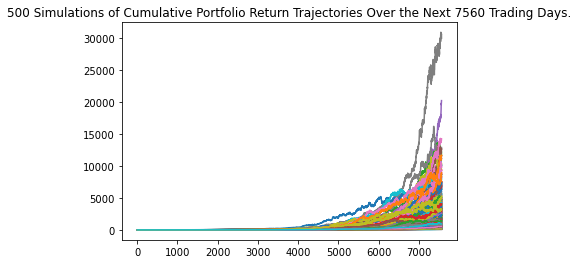

In [43]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_thirtyyear_faang.plot_simulation()


#### Plot the probability distribution of the Monte Carlo simulation.

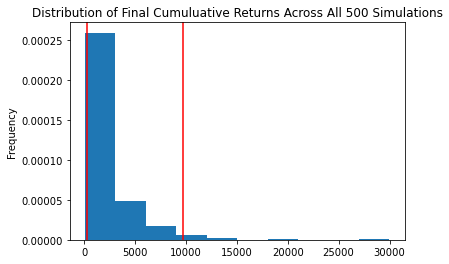

In [44]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_thirtyyear_faang.plot_distribution()


#### Generate the summary statistics for the Monte Carlo simulation.

In [45]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_thirtyyear_faang.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_summary_statistics)

count             500.000000
mean             2262.078479
std              2755.398910
min                66.057975
25%               685.477725
50%              1338.436749
75%              2631.941788
max             29976.054455
95% CI Lower      242.049586
95% CI Upper     9677.097859
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [46]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of your investing in FAANG stocks is ${savings_amount:,.2f}")


The current balance of your investing in FAANG stocks is $1,000.00


In [47]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_summary_statistics[8]*savings_amount
ci_upper_thirty_cumulative_return = MC_summary_statistics[9]*savings_amount

# Print the result of your calculations
print(f"There is a 95% chance that the portfolio over the next 30 years will end within in the range of ${ci_lower_thirty_cumulative_return:,.2f} and ${ci_upper_thirty_cumulative_return:,.2f}.")


There is a 95% chance that the portfolio over the next 30 years will end within in the range of $242,049.59 and $9,677,097.86.


## Coding for top 4 popular mutual funds
https://www.marketwatch.com/tools/mutual-fund/top25largest

In [48]:
tickers = ["SPY", "IVV", "VTI", "VOO"]

In [49]:
prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  start=start_date,
  end=end_date,
  limit=limit_rows
).df

In [50]:
display(prices_df.head())
display(prices_df.tail())

IVV                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2018-07-30 00:00:00-04:00  283.47  283.65  281.31  281.85  2925204  281.49   
2018-07-31 00:00:00-04:00  282.83  283.99  282.35  283.17  2362815  280.81   
2018-08-01 00:00:00-04:00  283.46  284.10  282.11  282.88  2282494  281.56   
2018-08-02 00:00:00-04:00  281.35  284.56  281.12  284.29  1931339  279.38   
2018-08-03 00:00:00-04:00  284.53  285.65  284.32  285.62  1646917  282.53   

                                                                  VOO  \
                             high       low   close    volume    open   
time                                                                    
2018-07-30 00:00:00-04:00  281.69  279.3600  279.89  46935673  258.60   
2018-07-31 00:00:00-04:00  282.02  280.3800  281.22  48645613  258.02   
2018-08-01 00:00:00-04:00  282.13  280.1315  280.92  40627557  258.64   
2018-08-02 00:00:00-04:00  282.58  279.1600  282.34  42491022  256.73   
2018-08-03 00:00:00-04:00  283.65  282.3300  283.64  34485363  259.60   

                                                                  VTI  \
                               high      low   close   volume    open   
time                                                                    
2018-07-30 00:00:00-04:00  258.7800  256.640  257.13  1427015  145.22   
2018-07-31 00:00:00-04:00  259.0900  257.600  258.35  1641924  144.82   
2018-08-01 00:00:00-04:00  259.1932  257.351  258.08  1208659  145.19   
2018-08-02 00:00:00-04:00  259.6000  256.480  259.38  1554536  144.17   
2018-08-03 00:00:00-04:00  260.6200  259.390  260.62  1351374  145.89   

                                                               
                               high      low   close   volume  
time                                                           
2018-07-30 00:00:00-04:00  145.3400  144.060  144.26  1896219  
2018-07-31 00:00:00-04:00  145.5100  144.541  145.11  1797513  
2018-08-01 00:00:00-04:00  145.5300  144.490  144.92  1309150  
2018-08-02 00:00:00-04:00  145.9100  144.078  145.77  1297220  
2018-08-03 00:00:00-04:00  146.2901  145.760  146.26  1683051

IVV                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2021-07-26 00:00:00-04:00  441.25  442.9300  441.18  442.91  2912365  439.31   
2021-07-27 00:00:00-04:00  441.83  441.8700  437.89  440.98  4082943  439.91   
2021-07-28 00:00:00-04:00  441.62  442.2300  439.23  440.72  3276527  439.68   
2021-07-29 00:00:00-04:00  441.74  443.7161  441.72  442.62  3254466  439.83   
2021-07-30 00:00:00-04:00  439.82  441.9800  439.71  440.41  2454443  437.91   

                                                                VOO          \
                             high     low   close    volume    open    high   
time                                                                          
2021-07-26 00:00:00-04:00  441.03  439.26  440.99  40155852  403.88  405.42   
2021-07-27 00:00:00-04:00  439.94  435.99  439.00  61032234  404.45  404.45   
2021-07-28 00:00:00-04:00  440.30  437.31  438.84  47642330  404.17  404.76   
2021-07-29 00:00:00-04:00  441.80  439.81  440.67  40930880  404.36  406.13   
2021-07-30 00:00:00-04:00  440.06  437.77  438.49  56594282  402.59  404.53   

                                                         VTI            \
                                low   close   volume    open      high   
time                                                                     
2021-07-26 00:00:00-04:00  403.8200  405.35  2242464  227.25  227.9000   
2021-07-27 00:00:00-04:00  400.8000  403.57  3514924  227.38  227.4301   
2021-07-28 00:00:00-04:00  402.0400  403.42  3621222  227.12  227.8100   
2021-07-29 00:00:00-04:00  404.3500  405.10  2116896  227.58  228.7500   
2021-07-30 00:00:00-04:00  402.4697  403.12  4130769  226.57  227.9195   

                                                      
                                low   close   volume  
time                                                  
2021-07-26 00:00:00-04:00  227.1300  227.87  2766367  
2021-07-27 00:00:00-04:00  224.9800  226.67  4001152  
2021-07-28 00:00:00-04:00  226.1881  227.06  3205829  
2021-07-29 00:00:00-04:00  227.5800  228.03  2850680  
2021-07-30 00:00:00-04:00  226.4000  226.72  2707083

In [51]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# Run 500 samples.
MC_thirtyyear_funds = MCSimulation(
  portfolio_data = prices_df,
  weights = [.25, .25, .25, .25],
  num_simulation = 500,
  num_trading_days = 252*30
)

# Review the simulation input data
MC_thirtyyear_funds.portfolio_data.head()


IVV                                   \
                             open    high     low   close   volume   
time                                                                 
2018-07-30 00:00:00-04:00  283.47  283.65  281.31  281.85  2925204   
2018-07-31 00:00:00-04:00  282.83  283.99  282.35  283.17  2362815   
2018-08-01 00:00:00-04:00  283.46  284.10  282.11  282.88  2282494   
2018-08-02 00:00:00-04:00  281.35  284.56  281.12  284.29  1931339   
2018-08-03 00:00:00-04:00  284.53  285.65  284.32  285.62  1646917   

                                           SPY                            ...  \
                          daily_return    open    high       low   close  ...   
time                                                                      ...   
2018-07-30 00:00:00-04:00          NaN  281.49  281.69  279.3600  279.89  ...   
2018-07-31 00:00:00-04:00     0.004683  280.81  282.02  280.3800  281.22  ...   
2018-08-01 00:00:00-04:00    -0.001024  281.56  282.13  280.1315  280.92  ...   
2018-08-02 00:00:00-04:00     0.004984  279.38  282.58  279.1600  282.34  ...   
2018-08-03 00:00:00-04:00     0.004678  282.53  283.65  282.3300  283.64  ...   

                               VOO                                   VTI  \
                               low   close   volume daily_return    open   
time                                                                       
2018-07-30 00:00:00-04:00  256.640  257.13  1427015          NaN  145.22   
2018-07-31 00:00:00-04:00  257.600  258.35  1641924     0.004745  144.82   
2018-08-01 00:00:00-04:00  257.351  258.08  1208659    -0.001045  145.19   
2018-08-02 00:00:00-04:00  256.480  259.38  1554536     0.005037  144.17   
2018-08-03 00:00:00-04:00  259.390  260.62  1351374     0.004781  145.89   

                                                                            
                               high      low   close   volume daily_return  
time                                                                        
2018-07-30 00:00:00-04:00  145.3400  144.060  144.26  1896219          NaN  
2018-07-31 00:00:00-04:00  145.5100  144.541  145.11  1797513     0.005892  
2018-08-01 00:00:00-04:00  145.5300  144.490  144.92  1309150    -0.001309  
2018-08-02 00:00:00-04:00  145.9100  144.078  145.77  1297220     0.005865  
2018-08-03 00:00:00-04:00  146.2901  145.760  146.26  1683051     0.003361  

[5 rows x 24 columns]

In [52]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear_funds.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000793,1.003267,0.998426,0.990600,0.993991,0.986825,0.991835,1.000947,0.996617,0.995547,...,1.011465,1.005795,1.008752,1.001779,1.011029,1.002610,1.005066,0.997296,0.992989,0.993962
2,1.005427,1.002592,1.000336,0.987009,0.994207,0.984766,0.986114,1.007607,1.001354,0.998273,...,1.004960,1.014251,0.989594,1.008574,1.005152,0.989015,1.016746,0.996775,1.006954,0.996318
3,0.994078,1.012760,1.011106,0.989941,0.997127,0.975539,0.998098,1.011966,1.011485,1.004871,...,1.003784,1.022098,0.986309,1.017508,1.003302,0.995113,1.013640,0.990090,1.018441,0.990350
4,1.000036,1.008623,1.015897,0.988332,1.006490,0.974223,1.011564,1.013174,1.009079,1.003952,...,0.985156,1.023387,0.996790,1.024829,1.001286,1.004945,1.029648,0.984561,1.025399,0.987194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,140.970330,104.591578,127.215576,68.342334,518.055210,122.360265,62.178302,233.143794,107.611253,90.287239,...,136.607581,101.106966,270.821891,167.178735,188.613649,175.760680,156.843393,799.671060,181.868789,227.395657
7557,139.963643,104.669554,127.985167,68.818651,524.356662,122.238214,61.911746,233.847452,107.522279,90.226156,...,136.604714,101.061439,270.810728,168.547676,188.399873,175.902367,157.176389,814.135371,182.036983,228.995844
7558,138.454373,105.340447,127.548396,68.598688,529.035497,121.408354,62.439208,235.217050,107.668809,90.420188,...,135.429235,101.719292,271.631902,169.980861,190.061374,176.573442,156.978789,823.874405,183.517773,227.532756
7559,139.946443,105.411138,127.911073,68.574289,533.689970,121.841806,62.335344,237.464652,107.604675,90.648309,...,135.768270,102.283926,274.965793,169.521434,189.098396,177.009353,156.230311,812.799722,184.752917,230.173941


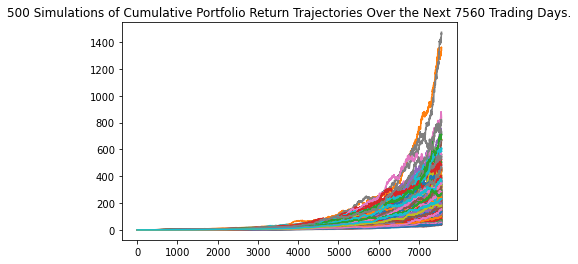

In [53]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_thirtyyear_funds.plot_simulation()

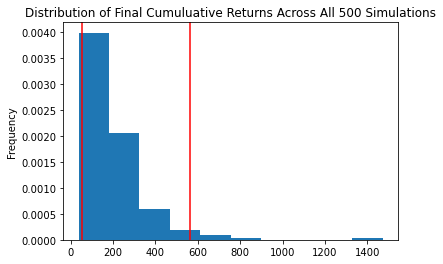

In [54]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_thirtyyear_funds.plot_distribution()


In [55]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_thirtyyear_funds.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_summary_statistics)

count            500.000000
mean             198.482310
std              149.098977
min               36.885844
25%              104.427300
50%              160.006761
75%              239.477882
max             1473.580929
95% CI Lower      55.554057
95% CI Upper     561.884237
Name: 7560, dtype: float64


In [56]:
# Print the current balance of the mutual funds of the members portfolio
print(f"The current balance of your investing in mutual funds is ${savings_amount:,.2f}")


The current balance of your investing in mutual funds is $1,000.00


In [57]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current mutual fund portfolio
ci_lower_thirty_cumulative_return = MC_summary_statistics[8]*savings_amount
ci_upper_thirty_cumulative_return = MC_summary_statistics[9]*savings_amount

# Print the result of your calculations
print(f"There is a 95% chance that the portfolio over the next 30 years will end within in the range of ${ci_lower_thirty_cumulative_return:,.2f} and ${ci_upper_thirty_cumulative_return:,.2f}.")

There is a 95% chance that the portfolio over the next 30 years will end within in the range of $55,554.06 and $561,884.24.


## Comparing investing in a "safe" bank account (i.e. high yield savings account, CD)
Compound Interest Formula FV = P (1 + r / n)^Yn, where P is the starting principal, r is the annual interest rate, Y is the number of years invested, and n is the number of compounding periods per year. FV is the future value, meaning the amount the principal grows to after Y years.

In [58]:
P = int(input("Enter starting principle please. "))
n = int(input("Enter number of compounding periods per year. "))
r = float(input("Enter annual interest rate. e.g. 15 for 15% "))
y = int(input("Enter the amount of years. "))

FV = P * (((1 + ((r/100.0)/n)) ** (n*y)))

print(f"The final amount after", y, f"years is ${FV:,.2f}.")

Enter starting principle please.  1000
Enter number of compounding periods per year.  1
Enter annual interest rate. e.g. 15 for 15%  7
Enter the amount of years.  30


The final amount after 30 years is $7,612.26.


In [59]:
# another way to write code for compounding interest.  can tinker with it to make into function that takes in variables from questionaire?

years = range(1,31)
rate = 0.07
rates = pd.Series(index = years, data = rate)

x = 1000*((rates + 1).cumprod())
final_amount = x.tail(1).item()
print(f"${final_amount:,.2f}.")


$7,612.26.
